# AI Exam (Ex 3)

An advanced aquatic drone is deployed to collect critical data on marine biodiversity in a coastal region. The drone starts at point $S$, located near the shore, and must navigate to point $G$, a designated marine research site rich in coral reefs and sea life. Along the way, the drone must carefully maneuver through dynamic underwater environments, avoiding hazards and optimizing energy usage.

The environment includes:  
1. **(O) Open Water:** Normal movement; no additional challenges.  
2. **(C) Currents:** Areas where ocean currents influence the drone's movement, potentially pushing it off course.  
3. **(F) Seaweed Forests:** Dense vegetation that slows the drone, incurring extra energy costs per move.    
4. **(R) Rocky Areas:** Dangerous zones that the drone must avoid, we do not know what happens to the agent if it enters in the cell.  
5. **(E) Energy Stations:** Specific points where the drone can recharge its battery, adding a small reward to encourage efficient navigation.  


<img src="images/env_ex3.png" style="zoom: 20%;"/>



### Environment Details:
The partial information on the enviroment you have are:
- **Grid Representation:** The above image represents the environment (a grid 10x10).  
- $S$ - Start state: The drone's starting point at (0, 0).  
- $G$ - Goal state: The marine research site at (9, 7) providing a large positive reward +20.0 and ending the episode.  
- **Movement Costs:** Each move has a default energy cost of -0.01.  
- **Hazards:**  
  - **Strong Currents:** Entering a current zone imposes a stochastic movement:  
    - 80% chance to move as intended.  
    - 10% chance to be pushed one cell in the left direction of the current.  
    - 10% chance to be pushed one cell in the right direction of the current. 
  - **Seaweed Forests:** Entering these zones incurs an additional -0.1 reward penalty.
  - **Rocky areas:** For these areas the model for the dynamics of the drones and the reward is not available
- **Energy Stations:** Provide a 0.1 reward when visited, (however reaching these cells may require the agent to move far from the goal).   

Consider the problem of computing the optimal solution for the environment reported above. You can interact with the environment using the code reported here below: 

[['S' 'O' 'O' 'F' 'F' 'C' 'R' 'R' 'R' 'R']
 ['O' 'R' 'R' 'C' 'C' 'C' 'F' 'E' 'F' 'F']
 ['O' 'O' 'F' 'C' 'R' 'C' 'F' 'F' 'F' 'F']
 ['R' 'R' 'F' 'C' 'E' 'C' 'F' 'O' 'F' 'R']
 ['O' 'F' 'F' 'C' 'R' 'C' 'F' 'O' 'F' 'R']
 ['R' 'E' 'F' 'R' 'R' 'O' 'F' 'C' 'F' 'R']
 ['O' 'F' 'C' 'C' 'C' 'O' 'F' 'C' 'F' 'C']
 ['O' 'F' 'F' 'F' 'O' 'O' 'O' 'F' 'F' 'C']
 ['O' 'O' 'O' 'O' 'R' 'R' 'R' 'R' 'F' 'R']
 ['R' 'R' 'R' 'O' 'O' 'O' 'O' 'G' 'O' 'F']]


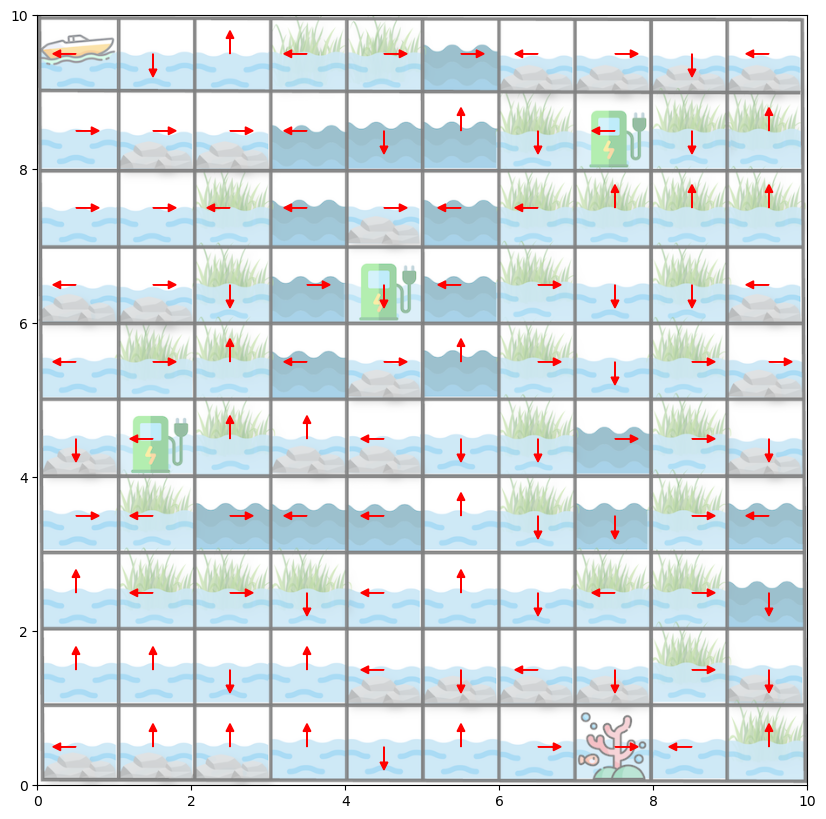

In [4]:
import os, sys 
import tqdm
import random

module_path = os.path.abspath(os.path.join('tools'))
if module_path not in sys.path:
    sys.path.append(module_path)

import gym, envs
from utils.ai_lab_functions import *
import numpy as np
from timeit import default_timer as timer
from tqdm import tqdm as tqdm

env_name = 'AquaticEnv-v0'
env = gym.make(env_name)

env.render()

# you can visualize the policy of a solution by calling the plot_policy function
policy = np.random.choice(list(env.actions.keys()), env.observation_space.n)
visual_policy = np.vectorize(env.actions.get)(policy.reshape(env.rows, env.cols)) 
plot_policy(visual_policy)

In [5]:
print("\nActions encoding: ", env.actions)

# Remember that you can know the type of a cell whenever you need by accessing the grid element of the environment:
print("Cell type of start state: ",env.grid[env.startstate])
print("Cell type of start state: {} Reward: {}".format(env.grid[env.startstate],env.RS[env.startstate]))
print("Cell type of goal state: {} Reward: {}".format(env.grid[env.goalstate],env.RS[env.goalstate]))
print("Cell type of energy state: {} Reward: {}".format(env.grid[env.pos_to_state(5,1)],env.RS[env.pos_to_state(5,1)]))
print("Cell type of forest state: {} Reward: {}".format(env.grid[env.pos_to_state(0,3)],env.RS[env.pos_to_state(0,3)]))
#print("Cell type of rocky state: {} Reward: {}".format(env.grid[env.pos_to_state(0,6)],env.RS[env.pos_to_state(0,6)]))

state = 15 # normal state
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print(f"Probability of effectivelty performing action {env.actions[0]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[0], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[1]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[1], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[2]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[2], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[3]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[3], state+1]}")

state = 10 # state with stochastic transitions
print(f"\nCell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print(f"Probability of effectivelty performing action {env.actions[0]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[0], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[1]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[1], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[2]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[2], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[3]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[3], state+1]}")

state = 10 # state with stochastic transitions
print(f"\nCell type of cell {env.state_to_pos(state)}: ",env.grid[state])
print(f"Probability of effectivelty performing action {env.actions[0]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[0], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[1]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[1], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[2]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[2], state+1]}")
print(f"Probability of effectivelty performing action {env.actions[3]} from cell {env.state_to_pos(state)} to cell {env.state_to_pos(state+1)}: {env.T[state, list(env.actions.keys())[3], state+1]}")



Actions encoding:  {0: 'L', 1: 'R', 2: 'U', 3: 'D'}
Cell type of start state:  S
Cell type of start state: S Reward: -0.01
Cell type of goal state: G Reward: 20.0
Cell type of energy state: E Reward: 0.1
Cell type of forest state: F Reward: -0.1
Cell type of cell (1, 5):  C
Probability of effectivelty performing action L from cell (1, 5) to cell (1, 6): 0.0
Probability of effectivelty performing action R from cell (1, 5) to cell (1, 6): 0.8
Probability of effectivelty performing action U from cell (1, 5) to cell (1, 6): 0.1
Probability of effectivelty performing action D from cell (1, 5) to cell (1, 6): 0.1

Cell type of cell (1, 0):  O
Probability of effectivelty performing action L from cell (1, 0) to cell (1, 1): 0.0
Probability of effectivelty performing action R from cell (1, 0) to cell (1, 1): 1.0
Probability of effectivelty performing action U from cell (1, 0) to cell (1, 1): 0.0
Probability of effectivelty performing action D from cell (1, 0) to cell (1, 1): 0.0

Cell type of 

<h6>I will use the Q-learning technique from Reinforcement Learning based on the exploration function: ε-greedy. The main reason behind this decision is because we don't know the exact reward from the rocky states (probably negative) and that the currents may be good or bad.<h6>

#### Q1: Can you find a solution that reaches the goal without touching any 'R' state and passing through at least one charging station in this environment?

In [8]:
def epsilon_greedy(q, state, epsilon):
    """
    Epsilon-greedy action selection function
    
    Args:
        q: q table
        state: agent's current state
        epsilon: epsilon parameter
    
    Returns:
        action id
    """
    if random.uniform(0,1) < epsilon: #enters the if only if the random number is less than epsilon (i.e., with probability  epsilon)
        return env.action_space.sample() #the size of first dimension of q is number of states, the second is number of actions 
    return q[state].argmax() #q[state] is a vector of q-values indexed by actions

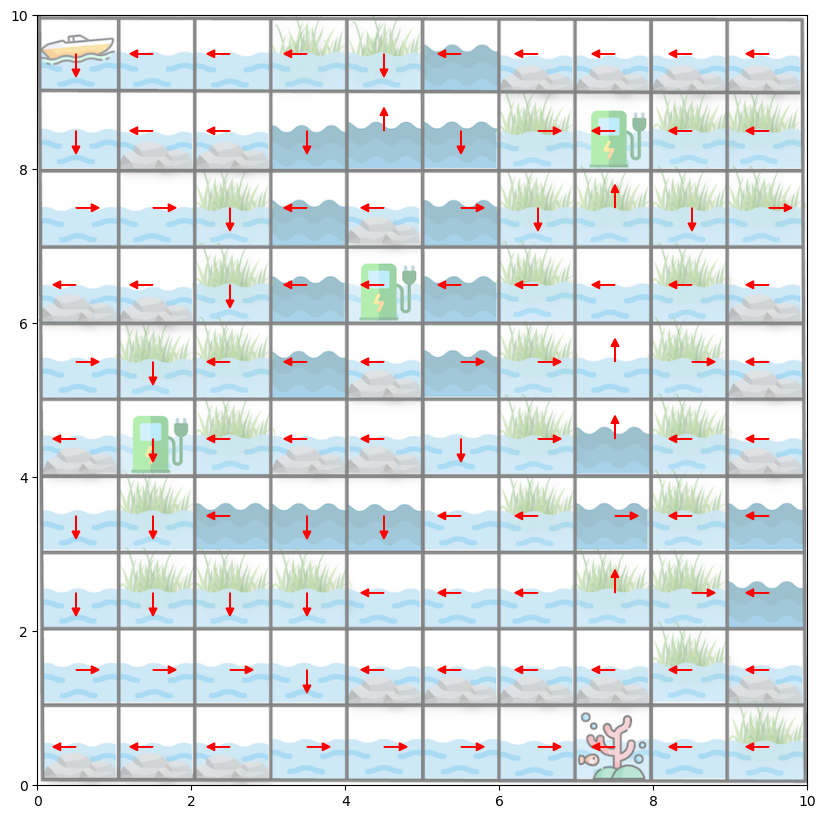

In [50]:
env_name = 'AquaticEnv-v0'
env = gym.make(env_name)

# for reproducibility purposes you can set a seed to your algorithm. For instance:
seed = 0
#sol, _, _ = your_method(env, your_hyperparams, seed=0)
# inside the function then
def your_method(env, episodes, alpha, gamma, expl_func, epsilon, seed=None):
    if seed is not None:
        np.random.seed(seed)
    # Initialize Q-table, rewards, and episode lengths
    q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = np.zeros(episodes)
    lengths = np.zeros(episodes)
    
    for i in range(episodes):
        state = env.reset()  # Start a new episode
        total_episode_reward = 0  
        steps = 0  #Count for the number of steps in this episode
        done = False
        
        while True:
            action = expl_func(q, state, epsilon)  #Applies an action using eps-greedy
            next_state, reward, done, _ = env.step(action)  #Take action and observe next state, reward, and if done = true
                
            # Aumentamos exploración si estamos en una estación de recarga
            #if env.grid[next_state] == "E":
                #epsilon = min(1.0, epsilon * 1.05)  # Aumentar epsilon temporalmente
            
            
            #Update Q-value using the Q-learning formula
            best_next_action = q[next_state].max()
            q[state, action] += alpha * (reward + gamma * best_next_action - q[state, action])
            
            total_episode_reward += reward
            state = next_state
            steps +=1
            if done:   #If the episode finished we leave the loop
                #print(f"Episode {i+1}: Total Reward = {total_episode_reward}")
                break
        
        # Store episode stats
        rewards[i] = total_episode_reward
        lengths[i] = steps
        
    policy = q.argmax(axis=1)
    return policy, rewards, lengths

# Call your method and compute the policy
episodes = 10000
alpha = 0.3
gamma = 0.99
epsilon = 0.1
seed = 0

policy, rewards, lenghts = your_method(env, episodes, alpha, gamma, epsilon_greedy, epsilon, seed=seed)

# Visualize the policy
visual_policy = np.vectorize(env.actions.get)(policy.reshape(env.rows, env.cols))
plot_policy(visual_policy)

# you can visualize the policy of a solution by calling the plot_policy function
#using a random policy for now, you should replace this with your solution 
#sol = np.random.choice(list(env.actions.keys()), env.observation_space.n)
